In [224]:
from sklearn.datasets import load_wine
# train, test set 나눠줌
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
# DBSCAN 보다는 HDBSCAN 을 권장함
# 하지만 데이터가 너무 무겁거나 하면 X
from sklearn.cluster import HDBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [225]:
wine = load_wine()

In [226]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

classification, regression, cluster

이상한 피처는 제거 또는 가중치 줄인다.

In [227]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [228]:
wine_df = pd.DataFrame(wine['data'],columns=wine['feature_names'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [229]:
X_train,x_test,y_train,y_test = train_test_split(wine_df,wine.target,random_state=12,test_size=0.3)

In [230]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

# RandomForestClassifier

In [231]:
dt = RandomForestClassifier(random_state=12, n_estimators=1000)
dt

RandomForestClassifier(n_estimators=1000, random_state=12)

In [232]:
dt.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=1000, random_state=12)

In [233]:
dt.score(x_test_scaled,y_test)

0.9814814814814815

In [234]:
dt.feature_importances_

array([0.13733565, 0.03700756, 0.01122176, 0.02812582, 0.02562154,
       0.05703373, 0.1386635 , 0.00989186, 0.03558299, 0.19259739,
       0.08809749, 0.10551584, 0.13330488])

In [235]:
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.37037037037037035

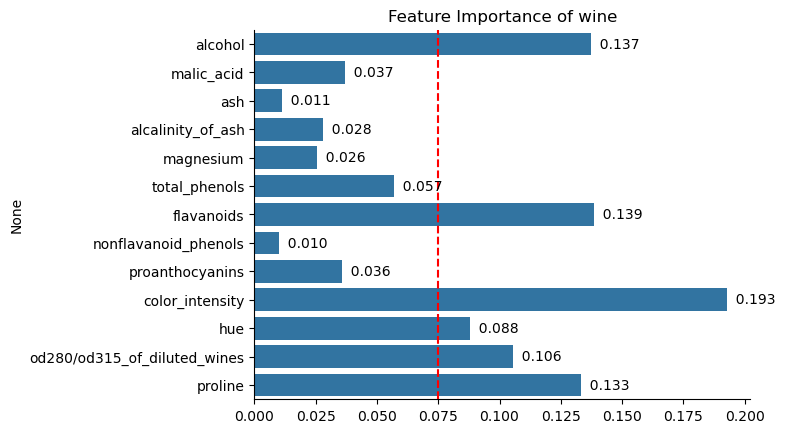

In [236]:
ax = sns.barplot(
    x=dt.feature_importances_,y=wine_df.columns)

threshold = 0.075
ax.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')

ax.bar_label(ax.containers[0],fmt='  %.3f')
plt.gca().spines[['right','top']].set_visible(False)
plt.title("Feature Importance of wine")
plt.show()

낮은값 처리

---

In [237]:
wine = load_wine()

In [238]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [239]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


값들의 스케일이 달라서 전처리를 해야한다.

과적합이 되거나 특정 피처에 몰릴 수 있다.

min/max scaling 을 해주는 것이 좋다. (0~1)

In [240]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12345)

In [241]:
len(y_train),len(y_test)

(124, 54)

In [242]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([39, 53, 32]))

In [243]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([20, 18, 16]))

In [244]:
ridge = RidgeClassifier(random_state=12345)

In [245]:
ridge.fit(X_train,y_train)

RidgeClassifier(random_state=12345)

In [246]:
ridge.score(X_train,y_train)

1.0

In [247]:
ridge.score(X_test,y_test)

0.9814814814814815

In [248]:
ada = AdaBoostClassifier(random_state=12345)

In [249]:
ada.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=12345)

In [250]:
ada.score(X_train,y_train)

0.9919354838709677

In [251]:
ada.score(X_test,y_test)

1.0

In [257]:
ada.feature_importances_

array([0.02, 0.  , 0.  , 0.  , 0.04, 0.  , 0.34, 0.  , 0.  , 0.02, 0.24,
       0.3 , 0.04])

In [258]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [252]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [253]:
X_lda = lda.fit_transform(X,y)

In [254]:
hdb = HDBSCAN(min_cluster_size=20)

In [255]:
hdb_pred = hdb.fit_predict(X_lda)

In [259]:
X_lda = pd.DataFrame(X_lda,columns=['1','2'])
X_lda['y'] = y
X_lda['y_pred'] =  hdb_pred

In [260]:
X_lda

,1,2,y,y_pred
0,-4.700244,1.979138,0,1
1,-4.301958,1.170413,0,1
2,-3.420720,1.429101,0,1
3,-4.205754,4.002871,0,-1
4,-1.509982,0.451224,0,-1
...,...,...,...,...
173,4.291508,3.390332,2,0
174,4.503296,2.083546,2,0
175,5.047470,3.196231,2,0
176,4.276155,2.431388,2,0


<Axes: >

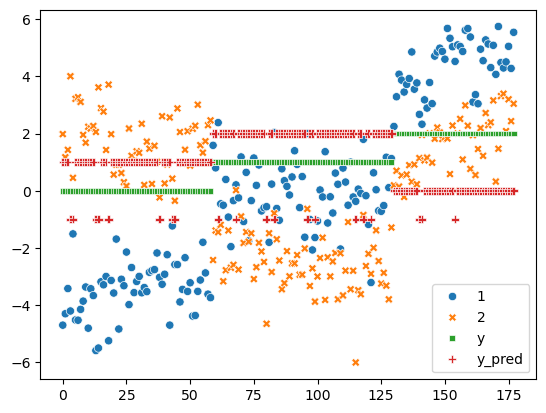

In [261]:
sns.scatterplot(
    X_lda
)